In [ ]:
import cv2

img = cv2.imread("/content/drive/MyDrive/archive (6)/dataset/with_mask/109-with-mask.jpg")

img.shape

(374, 296, 3)

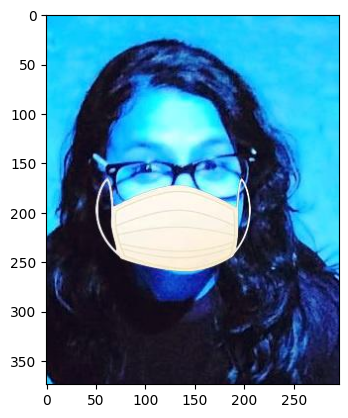

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)

#PROCESSING THE DATA

In [ ]:
dir = "/content/drive/MyDrive/archive (6)/dataset"

In [ ]:
import tensorflow as tf

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = 0.2,
                                                           horizontal_flip=True,
                                                           validation_split = 0.02
                                                            )

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,
                                                           validation_split = 0.2
                                                           )

In [ ]:
train_data = train_gen.flow_from_directory(dir,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           seed = 42,
                                           subset = "training"
                                           )

test_data = test_gen.flow_from_directory(dir,
                                         target_size = (224,224),
                                         class_mode = "categorical",
                                         seed = 42,
                                         subset = "validation"
                                         )

Found 1552 images belonging to 3 classes.
Found 316 images belonging to 3 classes.


In [ ]:
labels = list(train_data.class_indices.keys())

labels

['incorrect_mask', 'with_mask', 'without_mask']

# visualizing the train dataset


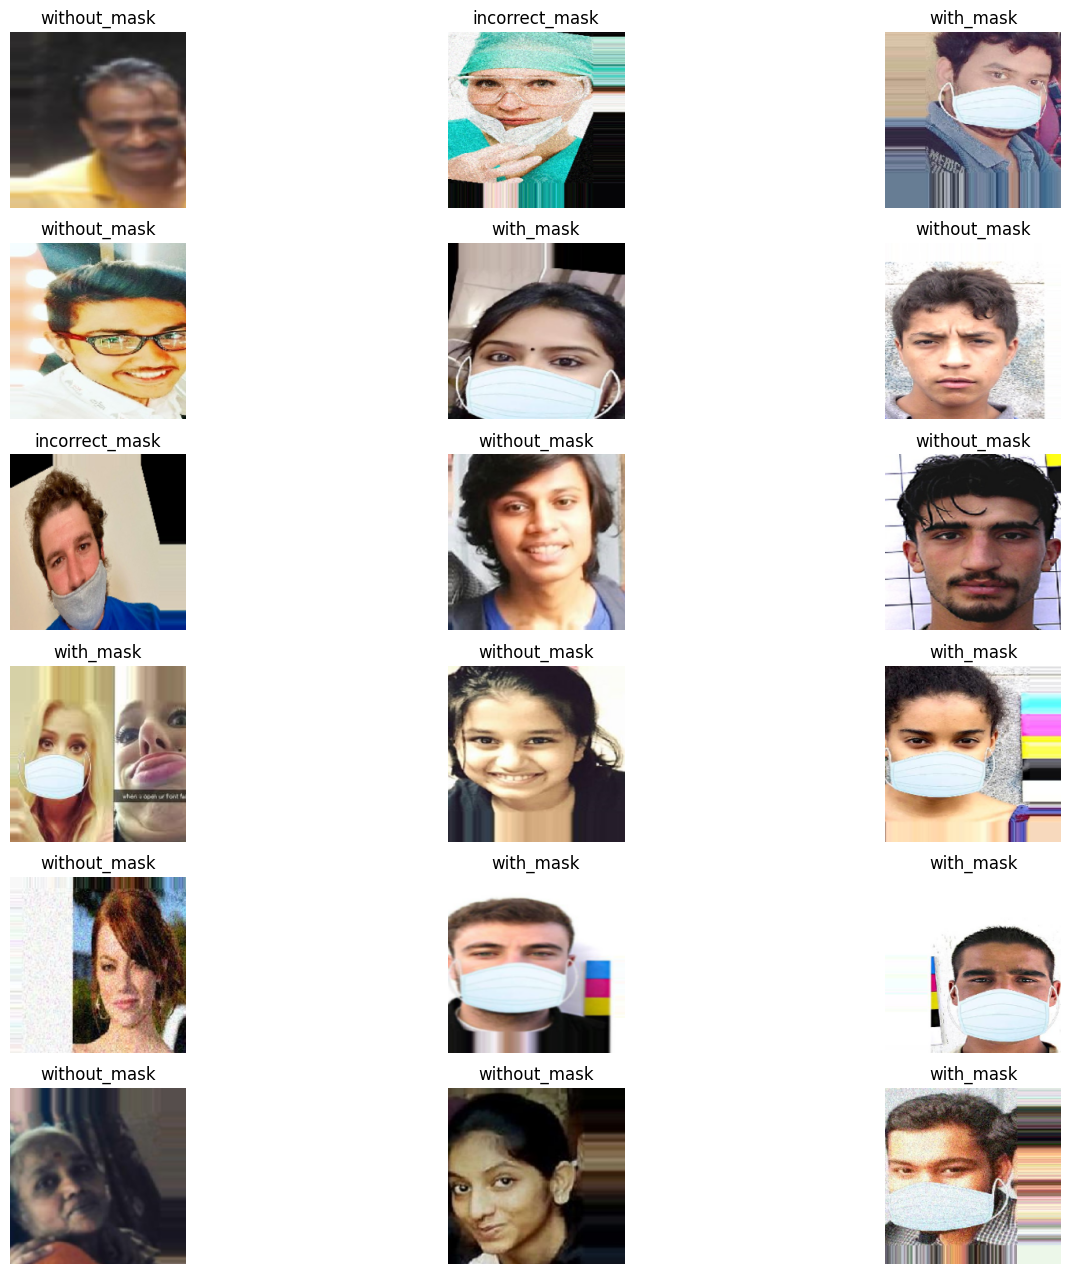

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize = (16,16))

for i in range(18):
  image,label = train_data.next()

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(labels[tf.argmax(label[i])])
  plt.axis("off")

# Building a CNN model

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers
model  = tf.keras.Sequential([

                              layers.Conv2D(filters= 64, kernel_size= 2, activation="relu", input_shape=(224,224,3)),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Flatten(),

                              layers.Dense(128, activation="relu"),
                              layers.Dropout(0.5),

                              layers.Dense(3, activation= "softmax")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 223, 223, 64)      832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 110, 110, 64)      16448     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 54, 54, 64)        16448     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 64)      

In [ ]:
# compiling the model

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
# fitting data to the model

model.fit(train_data,
          epochs = 10,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
          )

Epoch 1/10
49/49 [==============================] - 230s 5s/step - loss: 0.9370 - accuracy: 0.6108 - val_loss: 0.4752 - val_accuracy: 0.8354
Epoch 2/10
49/49 [==============================] - 224s 5s/step - loss: 0.5341 - accuracy: 0.8086 - val_loss: 0.2801 - val_accuracy: 0.8924
Epoch 3/10
49/49 [==============================] - 220s 4s/step - loss: 0.4549 - accuracy: 0.8325 - val_loss: 0.2432 - val_accuracy: 0.9114
Epoch 4/10
49/49 [==============================] - 212s 4s/step - loss: 0.3911 - accuracy: 0.8550 - val_loss: 0.1718 - val_accuracy: 0.9367
Epoch 5/10
49/49 [==============================] - 220s 4s/step - loss: 0.3402 - accuracy: 0.8724 - val_loss: 0.1717 - val_accuracy: 0.9494
Epoch 6/10
49/49 [==============================] - 216s 4s/step - loss: 0.3405 - accuracy: 0.8814 - val_loss: 0.1415 - val_accuracy: 0.9557
Epoch 7/10
49/49 [==============================] - 208s 4s/step - loss: 0.3112 - accuracy: 0.8918 - val_loss: 0.1554 - val_accuracy: 0.9557
Epoch 8/10
49

In [ ]:
model_evaluation = model.evaluate(test_data)

10/10 [==============================] - 12s 1s/step - loss: 0.1086 - accuracy: 0.9620


In [ ]:
print(f"Model Accuracy: {model_evaluation[1] * 100 : 0.2f} %")

Model Accuracy:  96.20 %


 # visualizing the test data

1/1 [==============================] - 1s 891ms/step


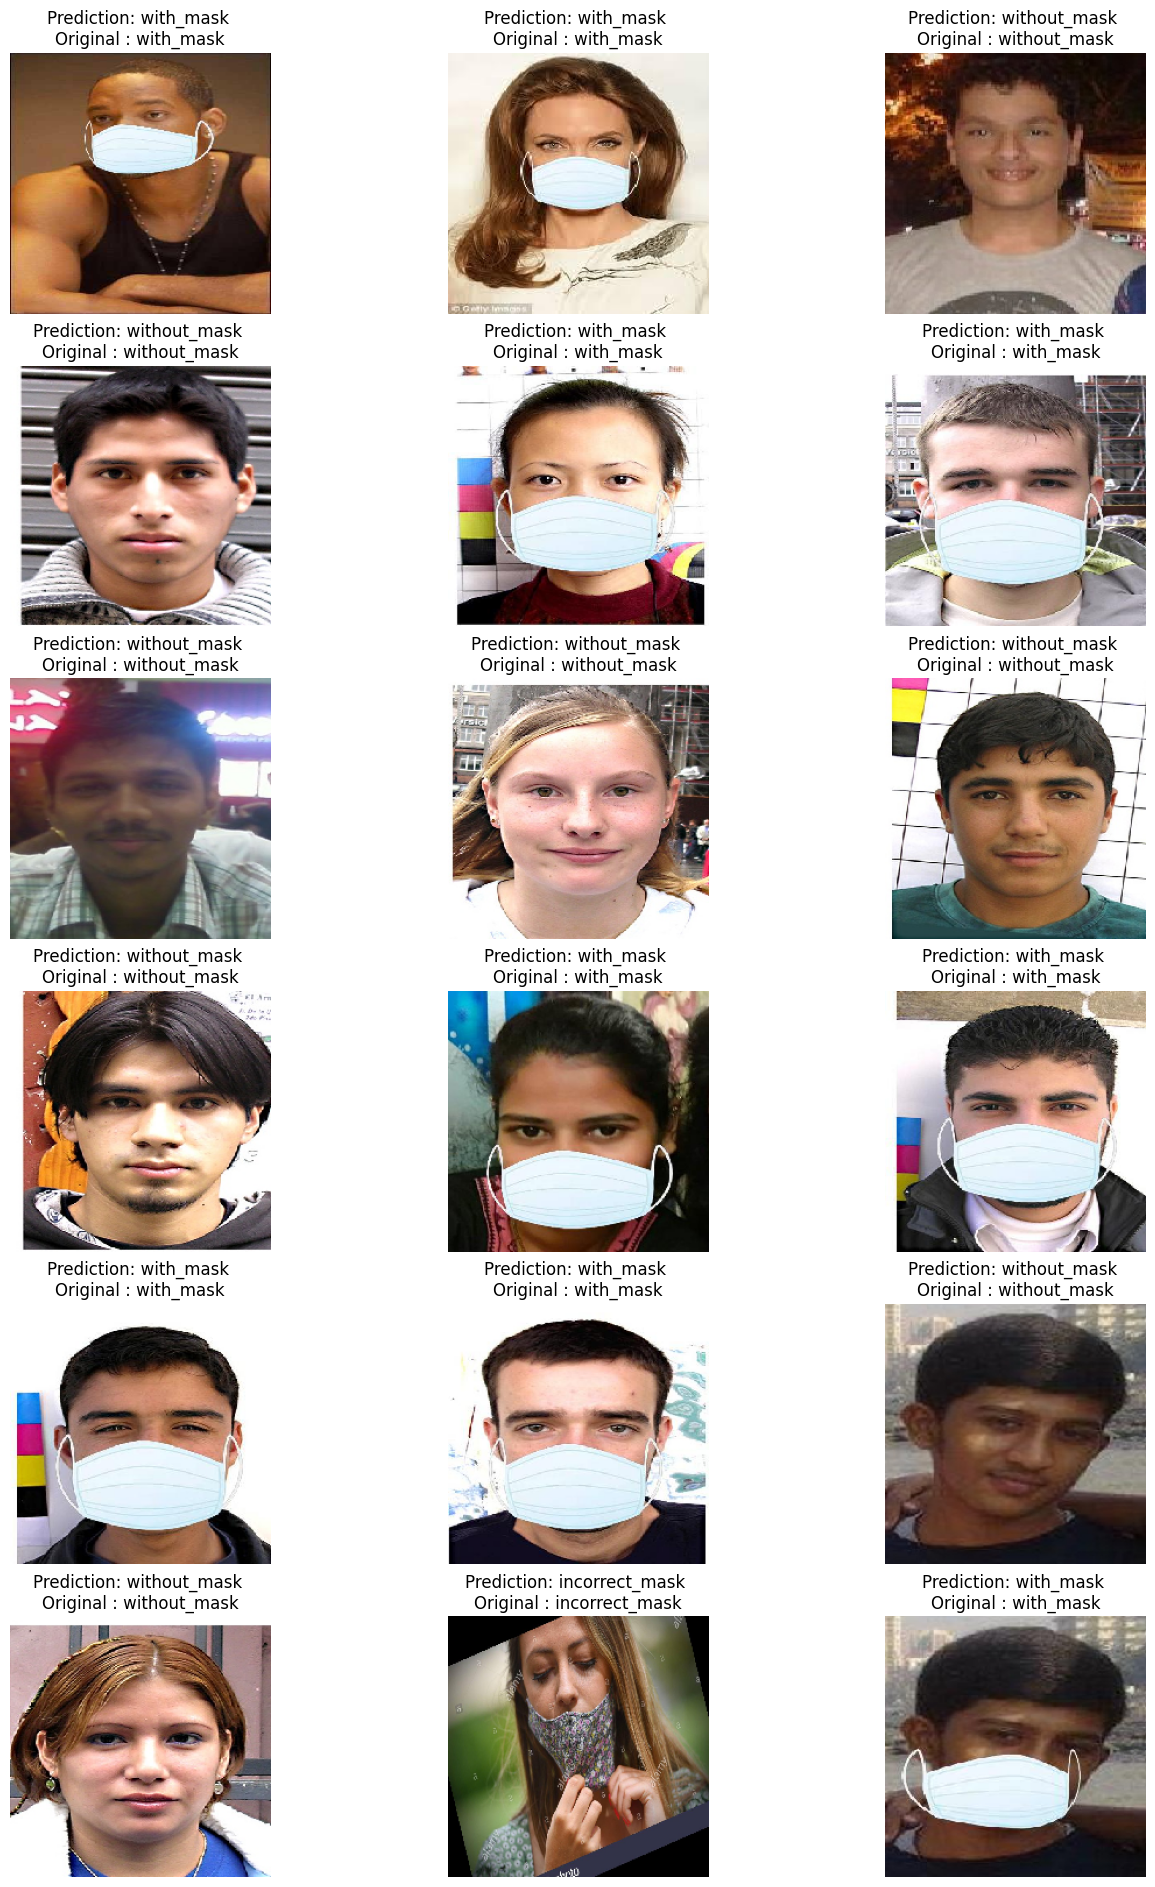

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(16,16))

for i in range(18):
  image, label = test_data.next()

  model_pred = model.predict(image)

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(f"Prediction: {labels[tf.argmax(model_pred[i])]} \nOriginal : {labels[tf.argmax(label[i])]}")
  plt.subplots_adjust(top= 1.25)
  plt.axis("off")